In [1]:
import pandas as pd
df = pd.read_csv("form.csv")


In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [3]:
def prepaer_df(df):
    columns = ['time', 'sex', 'child_offence', 'vegan', 'dvach', 'gender', 'rest', 'games', 'series', 'books', 'antisemetism', 'subject', 'crimea', 'putin', 'english', 'old_days','films']
    oldColumns = df.columns
    df = df.rename(columns=dict(zip(oldColumns, columns)) )
    df.time = pd.to_datetime(df.time)
    df.loc[df.sex == 'Мальчик' ,['sex']] = 0
    df.loc[df.sex == 'Девочка' ,['sex']] = 1
    df.loc[df.rest == 'Сычевать' ,['rest']] = 1
    df.loc[df.rest == 'Гулять' ,['rest']] = 0
    df = pd.get_dummies(df, drop_first=True,columns=['child_offence', 'dvach', 'gender', 'antisemetism', 'subject', 'crimea' ])
    df['putin_good'] = 0
    df.loc[(df.putin == 'Политик, лидер и боец') | (df.putin == 'Молодец'),['putin_good']]=1
    df['rebel'] = 1
    df.loc[(df.putin == 'Политик, лидер и боец') | (df.putin == 'Молодец'),['rebel']]=0
    df  =df.drop(columns=['putin'])
    df['month'] = df['time'].dt.month
    df['dayofweek'] = df['time'].dt.dayofweek
    df['day'] = df['time'].dt.day
    df['hour'] = df['time'].dt.hour
    df.loc[df['english'] == 'Оригатоё гайзаймас', ['english']] = 0
    df.loc[df['english'] == 'Чуть лучше, чем ничего', ['english']] = 1
    df.loc[df['english'] == 'Нормально', ['english']] = 2
    df.loc[df['english'] == 'Хорошо', ['english']] = 3
    df.loc[df['english'] == 'Отлично', ['english']] = 4
    df.loc[df['english'] == 'НЭЙТИВ ИНГЛИШ СПИКЕР', ['english']] = 5
    df.loc[df['old_days'] == 'Нет', ['old_days']] = 0
    df.loc[df['old_days'] != 'Нет', ['old_days']] = 1
    return df

In [4]:
df = prepaer_df(df)
labels = df["films"]
labels = labels.apply(lambda x: 1 if x.find('Аниме')  != -1 else 0 )
train = df.drop(columns=['films','time'])


In [5]:
def show_predict(predict,target):
    fpr, tpr, _ = roc_curve(  target,predict) 
    roc_auc  = auc(fpr , tpr )
    
    print('ROC curve (area = %0.2f)' % roc_auc)
    return;
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc )
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [10]:
# Поиск лучшей модели 

import time
 
from sklearn.model_selection import train_test_split
feature_train, feature_validate, target_train, target_validate = train_test_split(train, labels, test_size = 0.2, random_state =int(time.time())%20)

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(feature_train, target_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(feature_validate )
    acc = accuracy_score( target_validate, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    
    show_predict(train_predictions,target_validate)
    
    
    train_predictions = clf.predict_proba(feature_validate)
    ll = log_loss(target_validate, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 52.5000%
ROC curve (area = 0.46)
Log Loss: 4.028043290984876
SVC
****Results****
Accuracy: 60.0000%
ROC curve (area = 0.50)
Log Loss: 0.6841334769166866
NuSVC
****Results****
Accuracy: 67.5000%
ROC curve (area = 0.61)
Log Loss: 0.6571213539563
DecisionTreeClassifier
****Results****
Accuracy: 60.0000%
ROC curve (area = 0.57)
Log Loss: 13.815510557964274
RandomForestClassifier
****Results****
Accuracy: 60.0000%
ROC curve (area = 0.53)
Log Loss: 0.7019848127711514
AdaBoostClassifier
****Results****
Accuracy: 70.0000%
ROC curve (area = 0.67)
Log Loss: 0.662517096493097
GradientBoostingClassifier
****Results****
Accuracy: 57.5000%
ROC curve (area = 0.52)
Log Loss: 0.8958087795441727
GaussianNB
****Results****
Accuracy: 50.0000%
ROC curve (area = 0.57)
Log Loss: 3.108366558805174
LinearDiscriminantAnalysis
****Results****
Accuracy: 67.5000%
ROC curve (area = 0.65)
Log Loss: 0.7186688779731634
QuadraticDiscriminantAnalysis
****Results****
Accurac

/opt/conda/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


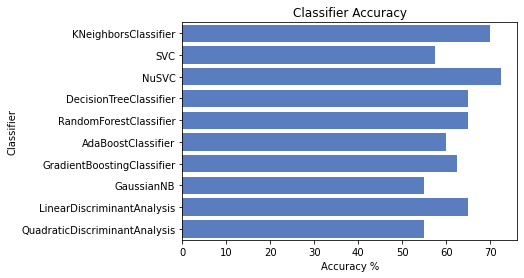

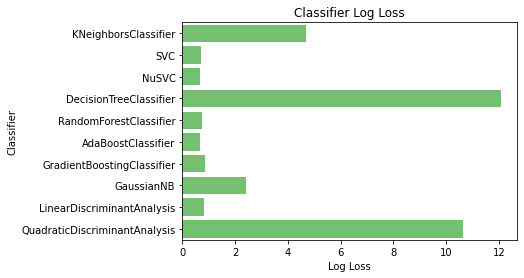

In [7]:
import seaborn as sns
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [8]:
for clf in classifiers:
    #clf.fit(feature_train, target_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(feature_train )
    acc = accuracy_score( target_train, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    
    show_predict(train_predictions,target_train)
    
    
    train_predictions = clf.predict_proba(feature_train)
    ll = log_loss(target_train, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 79.7468%
ROC curve (area = 0.72)
Log Loss: 0.37904408121504823
SVC
****Results****
Accuracy: 67.7215%
ROC curve (area = 0.50)
Log Loss: 0.532851165147529
NuSVC
****Results****
Accuracy: 83.5443%
ROC curve (area = 0.77)
Log Loss: 0.476211253517499
DecisionTreeClassifier
****Results****
Accuracy: 100.0000%
ROC curve (area = 1.00)
Log Loss: 9.992007221626413e-16
RandomForestClassifier
****Results****
Accuracy: 100.0000%
ROC curve (area = 1.00)
Log Loss: 0.15426953787800818
AdaBoostClassifier
****Results****
Accuracy: 81.0127%
ROC curve (area = 0.74)
Log Loss: 0.6566549884240536
GradientBoostingClassifier
****Results****
Accuracy: 99.3671%
ROC curve (area = 0.99)
Log Loss: 0.1043498871136142
GaussianNB
****Results****
Accuracy: 42.4051%
ROC curve (area = 0.56)
Log Loss: 3.0446088613129403
LinearDiscriminantAnalysis
****Results****
Accuracy: 80.3797%
ROC curve (area = 0.75)
Log Loss: 0.46084144489329154
QuadraticDiscriminantAnalysis
****Results

In [23]:
import pickle

In [28]:
clf =NuSVC(probability=True)
clf.fit(train, labels)
train_predictions = clf.predict(feature_train )
acc = accuracy_score( target_train, train_predictions)
print("Accuracy: {:.4%}".format(acc))  
show_predict(train_predictions,target_train)

Accuracy: 86.0759%
ROC curve (area = 0.80)


In [29]:
output = open('model.pkl', 'wb')
pickle.dump(clf, output, 2)
output.close()

In [30]:
input = open('model.pkl', 'rb')
obj = pickle.load(input)
input.close()

In [31]:
train_predictions = obj.predict(feature_train )
acc = accuracy_score( target_train, train_predictions)
print("Accuracy: {:.4%}".format(acc))  
show_predict(train_predictions,target_train)

Accuracy: 86.0759%
ROC curve (area = 0.80)


In [51]:
#df = pd.read_csv("form.csv")
#df = df.drop(columns=['А какие жанры фильмов любишь? '])
#df.to_csv('test_form.csv',index=False)

In [60]:
!python fair_example.py "test_form.csv"  "ans.csv"